In [9]:
# if you want to have a pop up sign in method instead please uncomment  on ee.Authenticate and ee.Initialize, but comment on below

import ee

# Trigger the authentication flow. if you want to user json, please comment this
ee.Authenticate()
# Initialize the library.
ee.Initialize()

# here we try to use json api information instead (service account) - comment below if you use above methode
#import ee
import math
from datetime import datetime

# uncomment this if you want to use json instead
#service_account = 'iqbalpythonapi@bukit30project.iam.gserviceaccount.com'
#credentials = ee.ServiceAccountCredentials(service_account, './bukit30project-4d92e5b46ea7.json')
#ee.Initialize(credentials)

Enter verification code: 4/1Adeu5BUyWHqMepZ0pDMikf_Q4EG6PBRWVtUtPv5JMNhQnu_woXOJLXTIGiM

Successfully saved authorization token.


In [155]:
FCD = ee.Image("users/muhfirdausiqbal/FCD_Check/FCD_LANDSATB30__2016_2017_no_TI_1_1")


In [156]:
pca_scale = 30

In [157]:
import geemap#.foliumap as geemap
import geopandas as gpd
import numpy as np
from sklearn.metrics import confusion_matrix

carbon_plot_xy = './shp_local/tnbt_plot_carbon.shp'
carbon_plot_xy_feat = geemap.shp_to_ee(carbon_plot_xy)

#band = high_forest_image.select([band_name_image])
    
# Unmask the band, replacing masked values (null) - Class: null with 0
unmasked_band = FCD.unmask(0)

# Use sampleRegions to extract pixel values at the point locations
sampled_points = unmasked_band.sampleRegions(
    collection=carbon_plot_xy_feat,
    scale=pca_scale,
    properties =['PLOT ID', 'Carbon Sto']
)

# Get the pixel values as a list
#pixel_values = sampled_points.aggregate_array('VD2').getInfo()


In [158]:
sampled_points.getInfo()

{'type': 'FeatureCollection',
 'columns': {},
 'properties': {'band_order': ['FCD']},
 'features': [{'type': 'Feature',
   'geometry': None,
   'id': '0_0',
   'properties': {'Carbon Sto': 534.34670454847,
    'FCD': 62.037546871039225,
    'PLOT ID': 'BT-1028'}},
  {'type': 'Feature',
   'geometry': None,
   'id': '1_0',
   'properties': {'Carbon Sto': 310.069797034826,
    'FCD': 49.2229254070614,
    'PLOT ID': 'BT-1074'}},
  {'type': 'Feature',
   'geometry': None,
   'id': '2_0',
   'properties': {'Carbon Sto': 166.579086318232,
    'FCD': 56.10235771078314,
    'PLOT ID': 'BT-11'}},
  {'type': 'Feature',
   'geometry': None,
   'id': '3_0',
   'properties': {'Carbon Sto': 261.646915040492,
    'FCD': 62.011897001462344,
    'PLOT ID': 'BT-110'}},
  {'type': 'Feature',
   'geometry': None,
   'id': '4_0',
   'properties': {'Carbon Sto': 410.725725398146,
    'FCD': 62.97049419725087,
    'PLOT ID': 'BT-111'}},
  {'type': 'Feature',
   'geometry': None,
   'id': '5_0',
   'properti

In [159]:
plot_arr = sampled_points.aggregate_array('PLOT ID').getInfo()

In [180]:
plot_arr

['BT-1028',
 'BT-1074',
 'BT-11',
 'BT-110',
 'BT-111',
 'BT-112',
 'BT-1145',
 'BT-1165',
 'BT-1188',
 'BT-12',
 'BT-1232',
 'BT-1233',
 'BT-1247',
 'BT-1274',
 'BT-1275',
 'BT-1303',
 'BT-1304',
 'BT-1306',
 'BT-1307',
 'BT-1311',
 'BT-1341',
 'BT-1371',
 'BT-1372',
 'BT-1374',
 'BT-1375',
 'BT-1403',
 'BT-1404',
 'BT-1405',
 'BT-1406',
 'BT-143',
 'BT-1433',
 'BT-153',
 'BT-1565',
 'BT-1566',
 'BT-1567',
 'BT-1577',
 'BT-1583',
 'BT-1595',
 'BT-1603',
 'BT-1604',
 'BT-163',
 'BT-168',
 'BT-17',
 'BT-180',
 'BT-187',
 'BT-188',
 'BT-189',
 'BT-193',
 'BT-203',
 'BT-204',
 'BT-205',
 'BT-217',
 'BT-218',
 'BT-228',
 'BT-229',
 'BT-230',
 'BT-238',
 'BT-24',
 'BT-244',
 'BT-245',
 'BT-25',
 'BT-274',
 'BT-33',
 'BT-34',
 'BT-343',
 'BT-376',
 'BT-377',
 'BT-378',
 'BT-379',
 'BT-380',
 'BT-416',
 'BT-417',
 'BT-418',
 'BT-441',
 'BT-477',
 'BT-499',
 'BT-500',
 'BT-512',
 'BT-544',
 'BT-602',
 'BT-631',
 'BT-632',
 'BT-661',
 'BT-663',
 'BT-693',
 'BT-728',
 'BT-729',
 'BT-73',
 'BT-75

In [168]:
fcd_arr = sampled_points.aggregate_array('FCD').getInfo()

In [169]:
carbon_stock_tcHa_arr = sampled_points.aggregate_array('Carbon Sto').getInfo()

In [170]:
fcd_arr

[62.037546871039225,
 49.2229254070614,
 56.10235771078314,
 62.011897001462344,
 62.97049419725087,
 67.11381148769443,
 51.46644474482755,
 58.52885935498275,
 52.822782504589924,
 61.318549722186255,
 56.47082342738238,
 56.47082342738238,
 60.439397427920554,
 56.96191779074921,
 59.4684028526774,
 62.70885380078296,
 69.14399373846153,
 61.23232159552184,
 63.3233457370568,
 51.709390927139886,
 66.10038363116243,
 64.02343139188291,
 60.279760719621756,
 62.940392745397546,
 60.50232278759984,
 56.574438111434674,
 74.20866186485944,
 65.90889564739201,
 62.452292259315385,
 71.06919805007205,
 63.78972475226071,
 60.960200140005725,
 58.766311074414055,
 61.07737771721058,
 54.217815578402266,
 54.33411878091729,
 61.83322040225775,
 64.81356493126005,
 55.77988449497847,
 60.57279813256728,
 64.84465768671511,
 67.09503388861697,
 67.69224517336298,
 50.8502320332573,
 68.21414212213459,
 63.500668897236,
 61.922455720779986,
 72.93356397423612,
 51.29892133561411,
 55.95659770

In [171]:
carbon_stock_tcHa_arr

[534.34670454847,
 310.069797034826,
 166.579086318232,
 261.646915040492,
 410.725725398146,
 207.951994037332,
 172.214831849755,
 402.73936403509,
 382.824977779551,
 201.308568278559,
 320.534279338438,
 246.513705536591,
 588.1346498608,
 233.197418561229,
 373.997484700776,
 413.064373066817,
 188.583116687129,
 222.87158981169,
 241.209829039502,
 387.931977818352,
 257.905095973975,
 174.058743813301,
 457.765612629333,
 744.413786012293,
 324.738590288759,
 169.514116253713,
 195.06138940449,
 214.460571595429,
 177.286949928165,
 278.92931929988,
 343.42422791963,
 525.186185883398,
 584.94236719973,
 366.876871096082,
 604.529531301099,
 385.93292713295,
 516.550219099463,
 321.950652581596,
 315.368780208421,
 623.451338270316,
 131.287812395591,
 309.35893273427,
 82.5917918243729,
 228.328108291756,
 260.309782640375,
 162.893269783104,
 134.362730205056,
 229.788428069992,
 320.135461899928,
 207.754145585558,
 245.232357897423,
 253.668828110335,
 329.626897252852,
 246

In [184]:
import pandas as pd

key_field = ['Plot_ID', 'FCD', 'Carbon_stock']
value_field = [plot_arr, fcd_arr, carbon_stock_tcHa_arr]

dict_data = {key_field[i]:value_field[i] for i in range(len(key_field)) }
data_pair_df = pd.DataFrame(dict_data)

In [189]:
pd.set_option('display.max_rows', None)
data_pair_df

,Plot_ID,FCD,Carbon_stock
0,BT-1028,62.037547,534.346705
1,BT-1074,49.222925,310.069797
2,BT-11,56.102358,166.579086
3,BT-110,62.011897,261.646915
4,BT-111,62.970494,410.725725
5,BT-112,67.113811,207.951994
6,BT-1145,51.466445,172.214832
7,BT-1165,58.528859,402.739364
8,BT-1188,52.822783,382.824978
9,BT-12,61.318550,201.308568


In [172]:
# alternatively
gdf = gpd.read_file(carbon_plot_xy)

In [173]:
gdf

,No,PLOT ID,X (deg),Y (deg),Basal Area,Carbon Sto,Land Cover,Land Cov_1,Height (m,geometry
0,1,BT-1028,102.58420,-1.04266,100.01,534.346705,Hutan Lahan Kering Primer,Hutan Dataran Rendah Rapat,262.0,POINT (102.58420 -1.04266)
1,2,BT-1074,102.57692,-1.04651,59.57,310.069797,Hutan Lahan Kering Primer,Hutan Dataran Rendah Rapat,201.0,POINT (102.57692 -1.04651)
2,3,BT-11,102.35714,-0.72506,32.13,166.579086,Hutan Lahan Kering Primer,Hutan Dataran Rendah Rapat,218.0,POINT (102.35714 -0.72506)
3,4,BT-110,102.38637,-0.79280,38.86,261.646915,Hutan Lahan Kering Primer,Hutan Dataran Rendah Rapat,264.0,POINT (102.38637 -0.79280)
4,5,BT-111,102.38317,-0.79053,56.88,410.725725,Hutan Lahan Kering Primer,Hutan Dataran Rendah Rapat,326.0,POINT (102.38317 -0.79053)
...,...,...,...,...,...,...,...,...,...,...
164,165,BT-984,102.55839,-1.02559,43.19,221.743991,Hutan Lahan Kering Sekunder,Hutan Dataran Rendah Sedang,187.0,POINT (102.55839 -1.02559)
165,166,BT-1017,102.68859,-1.03746,20.72,98.053887,Hutan Lahan Kering Sekunder,Hutan Dataran Rendah Jarang,156.0,POINT (102.68859 -1.03746)
166,167,BT-304,102.24585,-0.86012,33.46,98.205109,Hutan Lahan Kering Sekunder,Hutan Dataran Rendah Jarang,194.0,POINT (102.24585 -0.86012)
167,168,BT-922,102.68933,-1.01802,32.84,237.348638,Hutan Lahan Kering Sekunder,Hutan Dataran Rendah Jarang,170.0,POINT (102.68933 -1.01802)


In [174]:
#gdf['Carbon Sto'].tolist()

In [175]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Check if fcd_arr and carbon_stock_tcHa_arr are loaded properly and have data
print("fcd_arr shape:", np.array(fcd_arr).shape)
print("carbon_stock_tcHa_arr shape:", np.array(carbon_stock_tcHa_arr).shape)

# Convert arrays to numpy arrays and ensure they are 1D
x = np.array(fcd_arr).reshape(-1)
y = np.array(carbon_stock_tcHa_arr)

# Check if there are any NaN or missing values in the arrays
print("NaN in x:", np.isnan(x).any())
print("NaN in y:", np.isnan(y).any())

# Create the LinearRegression model and perform fitting and predictions
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Calculate R-squared score
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

fcd_arr shape: (169,)
carbon_stock_tcHa_arr shape: (169,)
NaN in x: False
NaN in y: False
R-squared: 0.012657474330000196


In [176]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Print the DataFrame
print(comparison_df)

         Actual   Predicted
0    534.346705  264.909626
1    310.069797  297.214540
2    166.579086  279.871892
3    261.646915  264.974288
4    410.725725  262.557720
..          ...         ...
164  221.743991  285.588084
165   98.053887  310.411267
166   98.205109  263.688350
167  237.348638  268.065807
168   91.253202  288.302500

[169 rows x 2 columns]


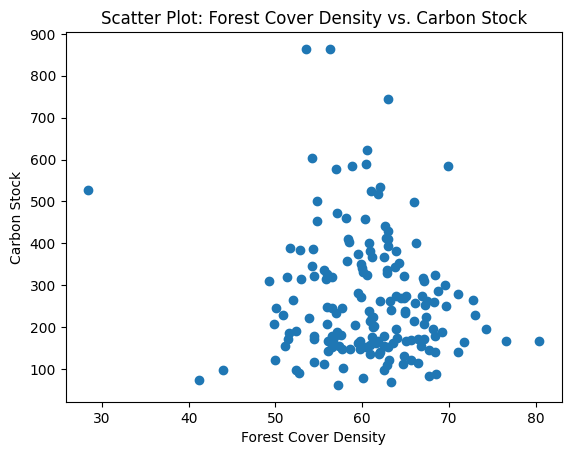

In [177]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('Forest Cover Density')
plt.ylabel('Carbon Stock')
plt.title('Scatter Plot: Forest Cover Density vs. Carbon Stock')
plt.show()

In [178]:
x = x.reshape(-1)  # Remove any unnecessary dimensions
y = y.reshape(-1)

correlation = np.corrcoef(x, y)[0, 1]
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.11250544133507642


In [179]:
y

array([534.34670455, 310.06979703, 166.57908632, 261.64691504,
       410.7257254 , 207.95199404, 172.21483185, 402.73936404,
       382.82497778, 201.30856828, 320.53427934, 246.51370554,
       588.13464986, 233.19741856, 373.9974847 , 413.06437307,
       188.58311669, 222.87158981, 241.20982904, 387.93197782,
       257.90509597, 174.05874381, 457.76561263, 744.41378601,
       324.73859029, 169.51411625, 195.0613894 , 214.4605716 ,
       177.28694993, 278.9293193 , 343.42422792, 525.18618588,
       584.9423672 , 366.8768711 , 604.5295313 , 385.93292713,
       516.5502191 , 321.95065258, 315.36878021, 623.45133827,
       131.2878124 , 309.35893273,  82.59179182, 228.32810829,
       260.30978264, 162.89326978, 134.36273021, 229.78842807,
       320.1354619 , 207.75414559, 245.2323579 , 253.66882811,
       329.62689725, 246.44415133, 452.12263063, 185.80883115,
       187.60077807, 120.81345334, 169.95848049, 286.83364937,
       194.53536514, 200.1855403 , 179.78527997, 152.32